Pregnancies  Glucose  Bloodpressure  Skinthickness  Insulin  Bodymass  \
0            6      148             72             35        0      33.6   
1            1       85             66             29        0      26.6   

   Diabetes_pedigree_function  Age            Class  
0                       0.627   50  tested_positive  
1                       0.351   31  tested_negative  
   Pregnancies  Glucose  Bloodpressure  Skinthickness  Insulin  Bodymass  \
0            6      148             72             35        0      33.6   
1            1       85             66             29        0      26.6   

   Diabetes_pedigree_function  Age  Class  
0                       0.627   50      1  
1                       0.351   31      0  


,Pregnancies,Glucose,Bloodpressure,Skinthickness,Insulin,Bodymass,Diabetes_pedigree_function,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bodymass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


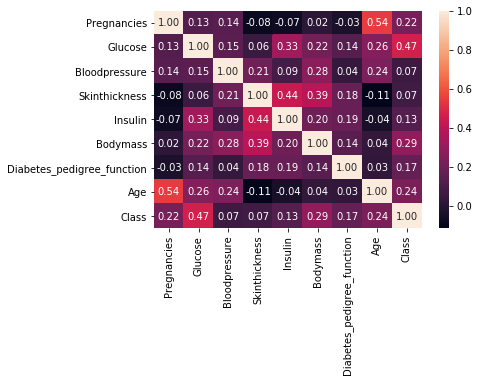

In [1]:
import pandas as pd
import numpy as np
import df_handler as dh
import diabetes_corr as dc
import diabetes_train as dt
from sklearn import metrics
import seaborn as sns

df = dh.read_csv('diabetes.csv') # csv file is loaded
print(df.head(2))

df = dh.negative_positive(df) 
print(df.head(2)) 

dc.plot_corr(df) 
df.corr() # Note fx. that glycose correlates 47% with the class(diabetes) 

Total number of rows and columns BEFORE cleaning = (768, 9) 
Number of rows missing - Pregnancies = 111
Number of rows missing - Glucose = 5
Number of rows missing - Bloodpressure  = 35
Number of rows missing - Skinthickness = 227
Number of rows missing - Insulin = 374
Number of rows missing - Body mass  = 11
Number of rows missing - Diabetes_pedigree_function = 0
Number of rows missing - Age  = 0

Total number of rows and columns AFTER cleaning = (625, 8) 


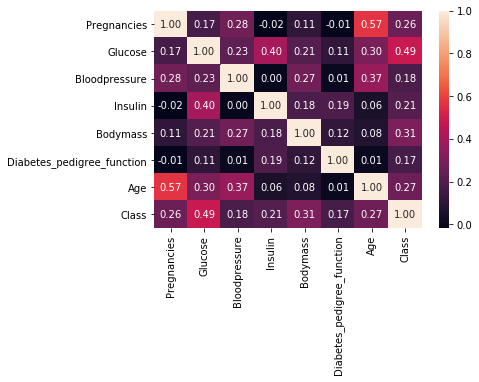

In [2]:
# Cleaning data
dh.zero_values(df)
dh.mean_val_insulin(df)

new_df = dh.new_dataframe(df)

In [3]:
newdf = dh.read_csv('newfile.csv') # cleaned csv file is loaded
print(newdf)

Pregnancies  Glucose  Bloodpressure  Insulin  Bodymass  \
0              6      148             72     79.8      33.6   
1              1       85             66     79.8      26.6   
2              8      183             64     79.8      23.3   
3              1       89             66     94.0      28.1   
4              5      116             74     79.8      25.6   
..           ...      ...            ...      ...       ...   
620           10      101             76    180.0      32.9   
621            2      122             70     79.8      36.8   
622            5      121             72    112.0      26.2   
623            1      126             60     79.8      30.1   
624            1       93             70     79.8      30.4   

     Diabetes_pedigree_function  Age  Class  
0                         0.627   50      1  
1                         0.351   31      0  
2                         0.672   32      1  
3                         0.167   21      0  
4                 

In [4]:
X_train, X_test, y_train,y_test = dt.train_data(newdf)
print("{0:0.2f}% in training set".format((len(X_train)/len(newdf.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(newdf.index)) * 100))

69.92% in training set
30.08% in test set


In [5]:
nb_model = dt.naive_bayes(X_train, y_train)
print(nb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [6]:
nb_predict_train_model = dt.models_acuracy(X_train, nb_model)
print("Accuracy: for training model {0:.3f}".format(metrics.accuracy_score(y_train,nb_predict_train_model)))

nb_predict_train_X_test = dt.models_acuracy_X_Test(y_test, nb_model)
print("\nAccuracy: for testing model {0:.3f}".format(metrics.accuracy_score(y_test,nb_predict_train_X_test)))

Accuracy: for training model 0.757

Accuracy: for testing model 0.660


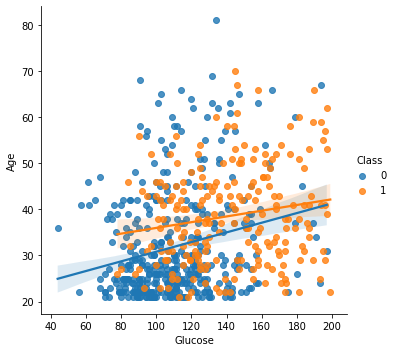

In [7]:
# Source : https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130
linear_regression = sns.lmplot(x="Glucose", y="Age", hue="Class", data=newdf)
print(linear_regression) # Diabetes negative persons are younger and has lower glucoselevels.

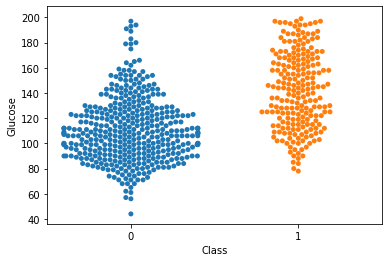

In [8]:
# Glucose is usually between 70 and 110. If it's above 180 you got too much glucose in the blood. If glucose is above 200 you got diabetes
sns.swarmplot(x="Class", y="Glucose", data=newdf) 

In [9]:
newdf.describe()
# or: newdf.groupby('Class').describe().transpose()

,Pregnancies,Glucose,Bloodpressure,Insulin,Bodymass,Diabetes_pedigree_function,Age,Class
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,4.478400,121.654400,72.164800,120.414720,32.017120,0.468834,34.248000,0.347200
std,3.218028,30.898597,12.355967,94.842591,6.426017,0.317285,11.775175,0.476461
min,1.000000,44.000000,24.000000,15.000000,18.200000,0.084000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,79.800000,27.400000,0.244000,25.000000,0.000000
50%,4.000000,117.000000,72.000000,79.800000,32.000000,0.378000,31.000000,0.000000
75%,7.000000,142.000000,80.000000,130.000000,35.900000,0.627000,42.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,57.300000,2.329000,81.000000,1.000000


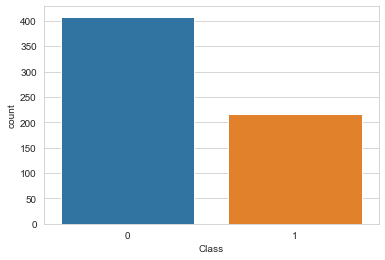

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=newdf)